In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ds = pd.read_csv("crop_yield_dataset.csv")

os.makedirs("plots", exist_ok=True)

print(ds.head())
print(ds.info())
print(ds.describe())


1. LINE PLOT (trend over time)


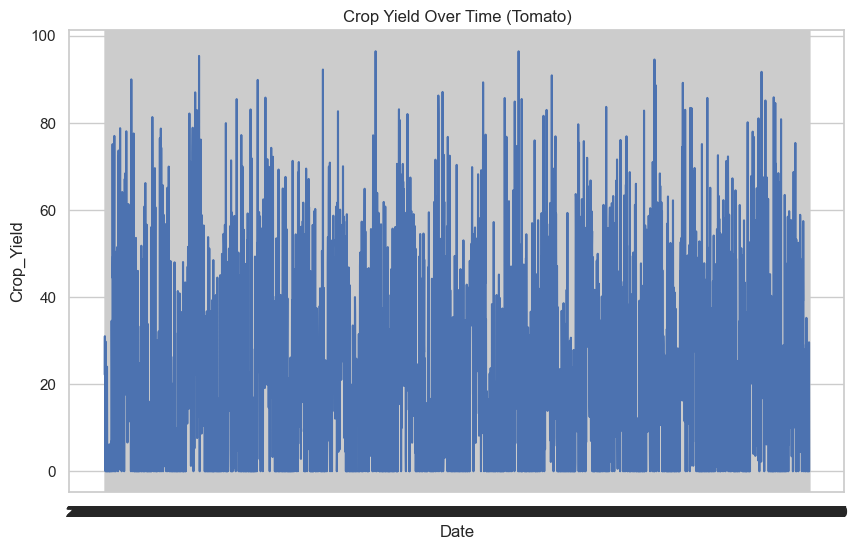

2. SCATTER PLOT (relationship between two variables)


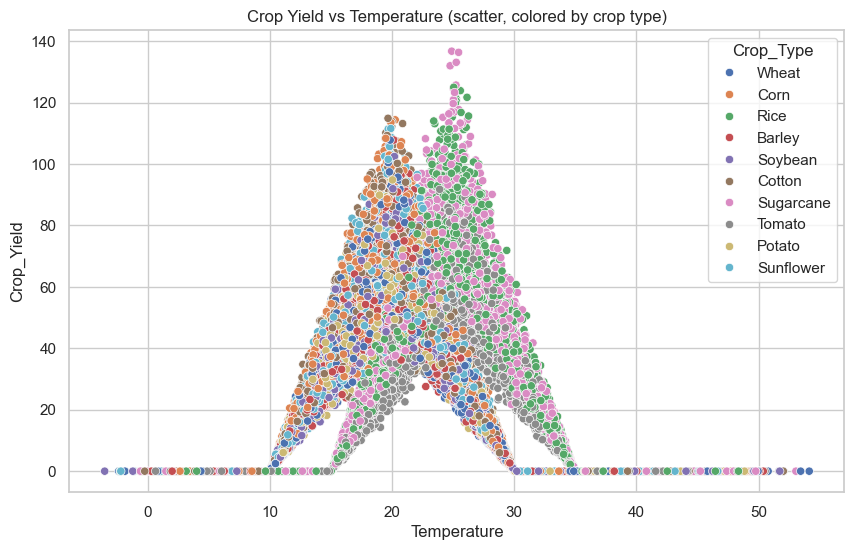

3. HISTOGRAM / DISTRIBUTION


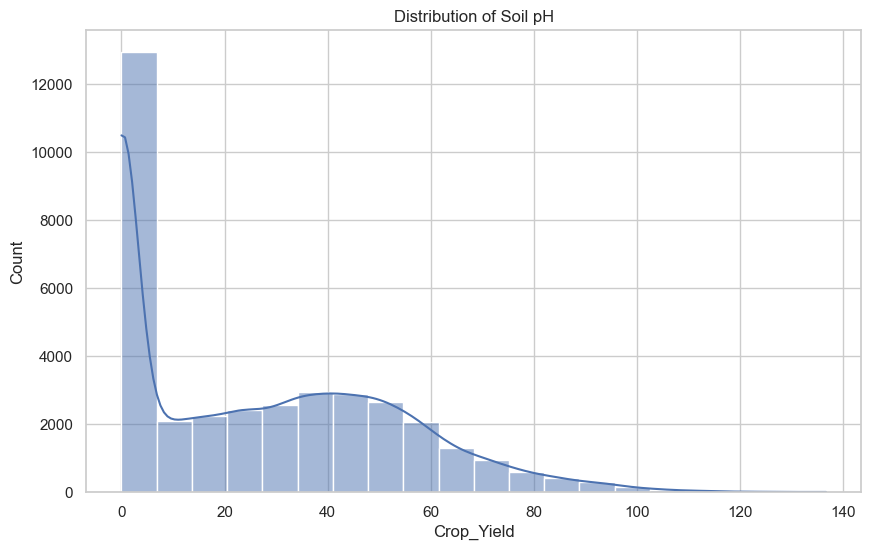

4. BOX PLOT (spread + outliers by category)


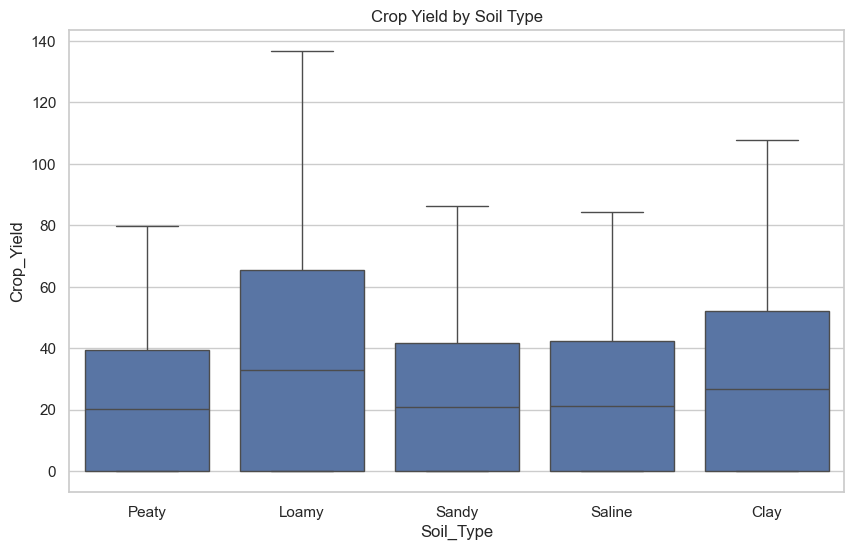

5. BAR PLOT (average values across categories)


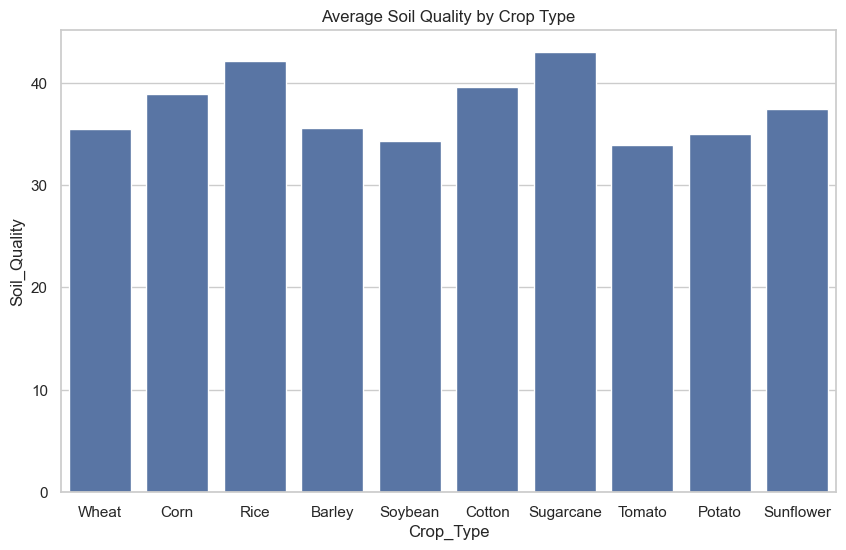

6. HEATMAP (correlation matrix)


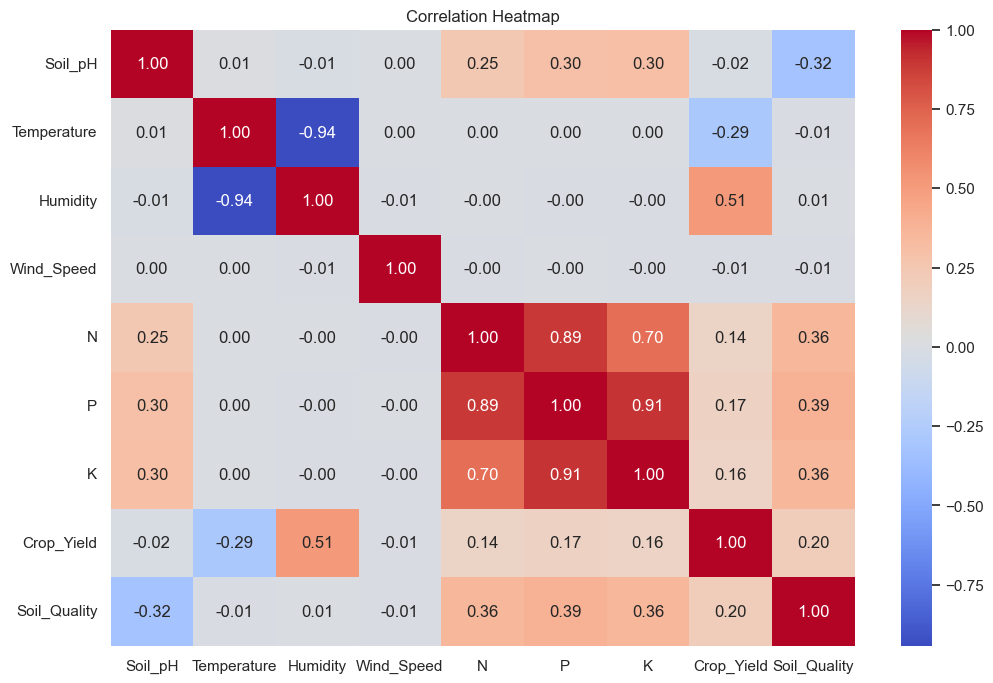

7. PAIRPLOT (scatterplots for all numeric relationships)


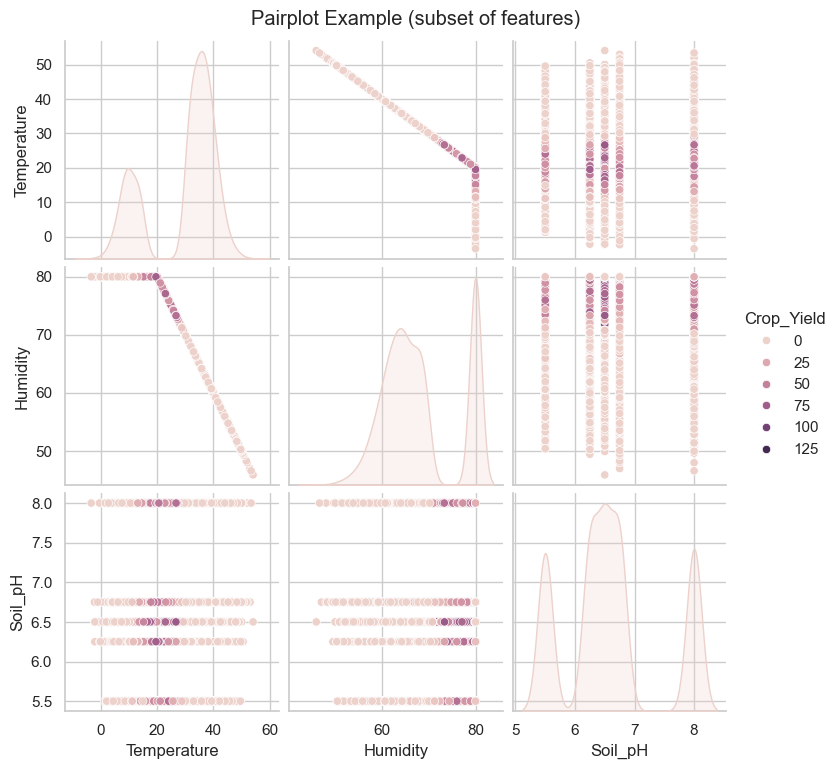

In [ ]:

# Set a nice style
sns.set_theme(style="whitegrid")

# Make all plots bigger by default
plt.rcParams["figure.figsize"] = (10, 6)

print("1. LINE PLOT (Crop Yield Over Time (Tomato))")
plt.figure()
tomato_ds = ds[ds["Crop_Type"] == "Tomato"]
sns.lineplot(x="Date", y="Crop_Yield", data=tomato_ds)
plt.title("Crop Yield Over Time (Tomato)")
plt.savefig("plots/lineplot_yield_over_time_tomato.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

print("2. SCATTER PLOT (relationship between two variables)")
plt.figure()
sns.scatterplot(x="Temperature", y="Crop_Yield", hue="Crop_Type", data=ds)
plt.title("Crop Yield vs Temperature (scatter, colored by crop type)")
plt.savefig("plots/scatter_yield_vs_temperature.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

print("3. HISTOGRAM / DISTRIBUTION")
plt.figure()
sns.histplot(ds["Crop_Yield"], bins=20, kde=True)
plt.title("Distribution of Soil pH")
plt.savefig("plots/hist_Crop_Yield.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

print("4. BOX PLOT (spread + outliers by category)")
plt.figure()
sns.boxplot(x="Soil_Type", y="Crop_Yield", data=ds)
plt.title("Crop Yield by Soil Type")
plt.savefig("plots/boxplot_yield_by_soiltype.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

print("5. BAR PLOT (average values across categories)")
plt.figure()
sns.barplot(x="Crop_Type", y="Soil_Quality", data=ds, errorbar=None)
plt.title("Average Soil Quality by Crop Type")
plt.savefig("plots/barplot_soilquality_by_crop.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

print("6. HEATMAP (correlation matrix)")
plt.figure(figsize=(12, 8))
corr = ds[["Soil_pH", "Temperature", "Humidity", "Wind_Speed", "N", "P", "K", "Crop_Yield", "Soil_Quality"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.savefig("plots/heatmap_correlations.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

print("7. PAIRPLOT (scatterplots for all numeric relationships)")
pair = sns.pairplot(ds[["Temperature", "Humidity", "Soil_pH", "Crop_Yield"]], hue="Crop_Yield")
pair.fig.suptitle("Pairplot Example (subset of features)", y=1.02)
pair.savefig("plots/pairplot_features.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()


In [ ]:
ds.describe()
ds.isnull().sum()

ds.corr(numeric_only=True)["Crop_Yield"].sort_values(ascending=False)

ds.groupby("Date")["Crop_Yield"].mean().plot(kind="line", marker="o")
plt.figure()
sns.lineplot(x="Date", y="Crop_Yield", data=ds)
plt.show()

ds.groupby("Crop_Type")["Crop_Yield"].mean().sort_values()
plt.figure()
sns.scatterplot(x="Crop_Type", y="Crop_Yield", hue="Crop_Type", data=ds)
plt.show()

ds.groupby("Soil_Type")["Crop_Yield"].mean().sort_values()
plt.figure()
sns.scatterplot(x="Soil_Type", y="Crop_Yield", hue="Crop_Type", data=ds)
plt.show()

ds.groupby("Soil_Quality")["Crop_Yield"].mean().sort_values()
plt.figure()
sns.scatterplot(x="Soil_Quality", y="Crop_Yield", hue="Crop_Type", data=ds)

